# EDA for G2M Insight for Cab Investment Firm

In [1]:
# Import libraries needed to extract insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Datasets

# 1. Cab Data: 
## this file includes details of transaction for 2 cab companies

In [2]:
df1 = pd.read_csv(r"C:\Users\Aya K\Desktop\week 2 data glacier\Cab_Data.csv")

# display the first few rows to get a quick glimpse of the data

df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# After execution of the dataset, did you notice anything strange? 

We can spot that the "Date of Travel" column's format is not the best for readability.
Therefore, let's change the format from integer to date time

In [3]:
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'], origin='1899-12-30', unit='D')

# Verify the updated DataFrame

df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# We are told that the Time period of data is from 31/01/2016 to 31/12/2018. Let's confirm if this is true.

df1.sort_values(by = 'Date of Travel', ascending = False)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
357693,10437898,2018-12-31,Yellow Cab,CHICAGO IL,3.18,44.06,40.8312
359160,10439843,2018-12-31,Yellow Cab,TUCSON AZ,6.42,116.99,90.1368
354112,10433307,2018-12-31,Pink Cab,LOS ANGELES CA,27.16,360.23,320.4880
357944,10438192,2018-12-31,Yellow Cab,CHICAGO IL,38.61,469.94,509.6520
354114,10433309,2018-12-31,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400
...,...,...,...,...,...,...,...
152,10000163,2016-01-02,Pink Cab,PHOENIX AZ,4.44,71.57,48.8400
341,10000492,2016-01-02,Yellow Cab,CHICAGO IL,36.00,883.93,492.4800
636,10000787,2016-01-02,Yellow Cab,LOS ANGELES CA,12.10,322.74,158.2680
993,10001303,2016-01-02,Yellow Cab,WASHINGTON DC,41.07,855.57,522.4104


## We can conclude that the most recent date is 2018/12/31 and the earliest is 2016/1/2 (Format: Year, Month, Day)

# Data Information

column names, data types, and the number of non-null values in each column

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


# Data Description

various statistical measures like count, mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, and 75%).

In [6]:
df1.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


# Are there any missing/null values?

In [7]:
Null_Values = df1.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


# What is the data type of each column?

In [8]:
df1.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

# How many values in each column are unique/distinct?

In [9]:
df1.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

# What are the 2 distinct cab companies that we are going to decide from? 

In [10]:
df1['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

# Let's also check the distinct cities.

In [11]:
df1['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

# Deduplication Validation

checks if there are any duplicates in our dataset

In [12]:
duplicates = df1.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


# Repeat same steps for all datasets

# 2. Customer ID Data: 
## this is a mapping table that contains a unique identifier which links the customer’s demographic details

In [13]:
df2 = pd.read_csv(r"C:\Users\Aya K\Desktop\week 2 data glacier\Customer_ID.csv")

# display the first few rows to get a quick glimpse of the data

df2.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
df2.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [16]:
Null_Values = df2.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


In [17]:
df2.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [18]:
df2.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

## What are the distinct ages of the customers in the dataset? 

In [19]:
df2['Age'].unique()

array([28, 27, 53, 23, 33, 25, 19, 57, 20, 63, 58, 29, 38, 31, 40, 22, 18,
       34, 21, 24, 44, 30, 26, 46, 62, 47, 43, 32, 60, 52, 51, 48, 39, 45,
       61, 54, 37, 42, 41, 35, 36, 64, 55, 49, 50, 56, 65, 59],
      dtype=int64)

In [20]:
duplicates = df2.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


# 3. Transaction ID Data: 
## this is a mapping table that contains transaction to customer mapping and payment mode

In [21]:
df3 = pd.read_csv(r"C:\Users\Aya K\Desktop\week 2 data glacier\Transaction_ID.csv")

# display the first few rows to get a quick glimpse of the data

df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [23]:
df3.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [24]:
Null_Values = df3.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


In [25]:
df3.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [26]:
df3.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [27]:
# What are the two payment types?

df3['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [28]:
duplicates = df3.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


# 4. City Data: 
## this file contains list of US cities, their population and number of cab users

In [29]:
df4 = pd.read_csv(r"C:\Users\Aya K\Desktop\week 2 data glacier\City.csv")

# display the first few rows to get a quick glimpse of the data

df4.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


## Remove the Commas from the Population and Users columns so we can easily use them for visualziation as integers later instead of strings

In [30]:
df4['Population'] = df4['Population'].str.replace(',', '').astype(int)
df4['Users'] = df4['Users'].str.replace(',', '').astype(int)

df4

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [32]:
df4.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [33]:
Null_Values = df4.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


In [34]:
df4.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [35]:
df4.nunique()

City          20
Population    20
Users         20
dtype: int64

# What are the distinct cities? 

In [36]:
df4['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [37]:
duplicates = df4.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


# Merge the datasets based on the common columns/fields: Transaction ID and Customer ID

In [38]:
merged_data = pd.merge(pd.merge(pd.merge(df1, df3, on='Transaction ID'), df2, on='Customer ID'), df4, on='City')

# Save the merged dataset as the new data

merged_data.to_csv('new_data.csv')

merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [39]:
merged_data = merged_data.set_index('Company')
merged_data.sort_values(by = 'Company')

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Company,,,,,,,,,,,,,
Pink Cab,10000011,2016-01-08,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
Pink Cab,10113236,2016-11-27,SACRAMENTO CA,28.56,333.97,294.1680,46296,Card,Female,25,14123,545776,7044
Pink Cab,10113237,2016-11-29,SACRAMENTO CA,14.69,163.86,148.3690,45265,Cash,Female,39,22489,545776,7044
Pink Cab,10113238,2016-11-26,SACRAMENTO CA,5.95,68.31,62.4750,46529,Card,Male,24,26695,545776,7044
Pink Cab,10124222,2016-12-25,DALLAS TX,35.52,561.91,380.0640,25281,Cash,Female,36,15741,942908,22157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow Cab,10144268,2017-02-09,LOS ANGELES CA,34.00,666.38,432.4800,6706,Cash,Male,24,34683,1595037,144132
Yellow Cab,10086569,2016-10-04,LOS ANGELES CA,38.08,548.11,534.6432,6706,Card,Male,24,34683,1595037,144132
Yellow Cab,10382889,2018-09-28,LOS ANGELES CA,5.25,107.97,74.9700,6785,Card,Female,22,34197,1595037,144132


# Visualize the Correlation between the Merged Data

In [40]:
plt.style.use('classic')

corr = merged_data.corr()
corr

C:\Users\Aya K\AppData\Local\Temp\ipykernel_15452\2132260305.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_data.corr()


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


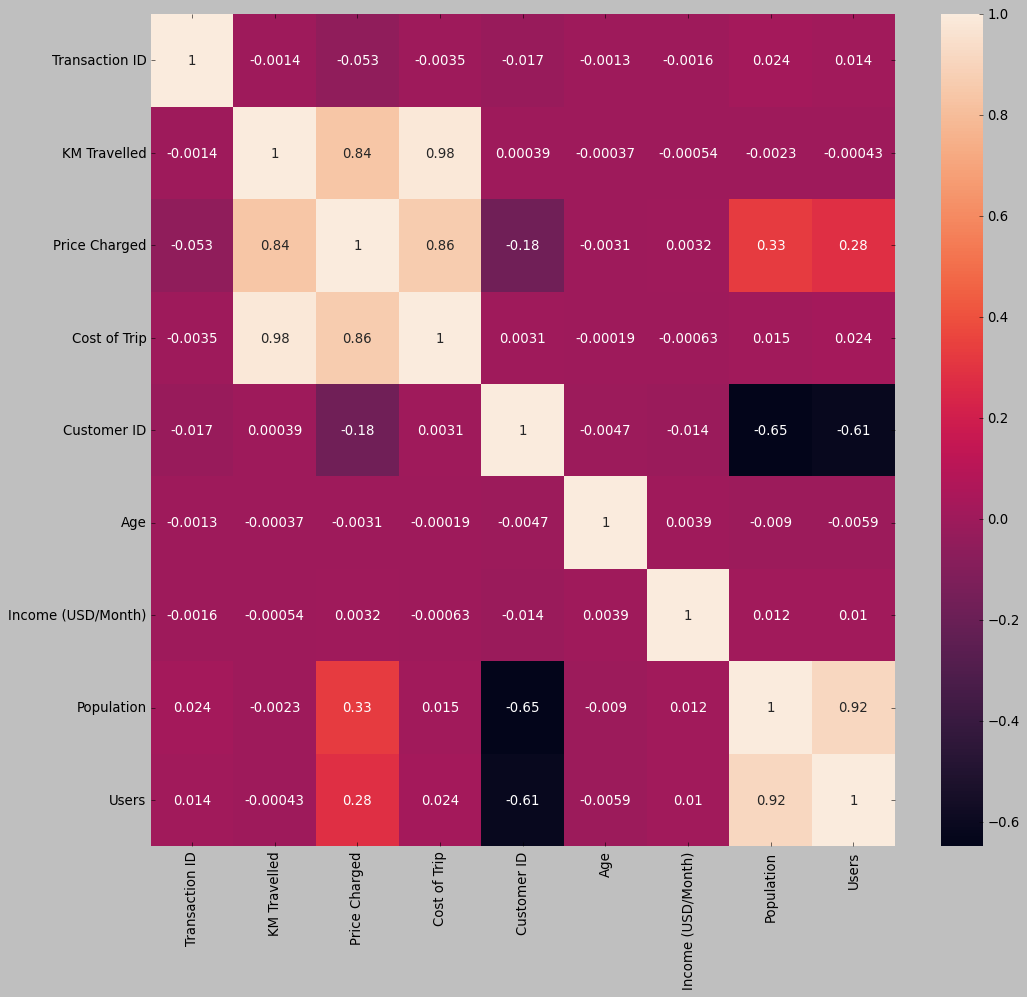

In [64]:
sns.heatmap(corr, annot = True)

plt.rcParams['figure.figsize'] = (17, 13)

plt.show()

# We can conclude that there is a high correlation between:
## 1. Cost of Trip, Price Charged, & KM Travelled
## 2. Population & Users

In [42]:
# Let's create Tables for each of those high correlations

Table1 = merged_data.groupby('Company')[['Cost of Trip', 'Price Charged', 'KM Travelled']].mean()
Table1

Table2 = merged_data.groupby('Company')[['Population', 'Users']].sum()
Table2

# Compare the performance of the two cab companies

company_revenue = merged_data.groupby('Company')['Price Charged'].sum()

company_average_price_and_cost = merged_data.groupby('Company')['Price Charged', 'Cost of Trip'].mean()

company_transactions = merged_data.groupby('Company')['Transaction ID'].count()

company_customers = merged_data.groupby('Company')['Customer ID'].nunique()

merged_data['Profit Margin'] = (merged_data['Price Charged'] - merged_data['Cost of Trip']) / merged_data['Price Charged']

# Group the data by company and calculate the profit margin
profit_margin_by_company = merged_data.groupby('Company')['Profit Margin'].sum()

print("Company Revenue:")
print(company_revenue)

print("\nProfit Margin by Company:")
print(profit_margin_by_company)

print("\nAverage Price and Cost by Company:")
print(company_average_price_and_cost)

print("\nNumber of Transactions by Company:")
print(company_transactions)

print("\nNumber of Customers by Company:")
print(company_customers)




Company Revenue:
Company
Pink Cab      2.632825e+07
Yellow Cab    1.258539e+08
Name: Price Charged, dtype: float64

Profit Margin by Company:
Company
Pink Cab      14723.477072
Yellow Cab    82773.867449
Name: Profit Margin, dtype: float64

Average Price and Cost by Company:
            Price Charged  Cost of Trip
Company                                
Pink Cab       310.800856    248.148682
Yellow Cab     458.181990    297.922004

Number of Transactions by Company:
Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

Number of Customers by Company:
Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64


C:\Users\Aya K\AppData\Local\Temp\ipykernel_15452\113537510.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  company_average_price_and_cost = merged_data.groupby('Company')['Price Charged', 'Cost of Trip'].mean()


# This tells us that the Yellow Cab Company has Higher Revenue, Higher Avg Price & Cost, Higher Number of Transactions, and More Customers than the Pink Cab Company

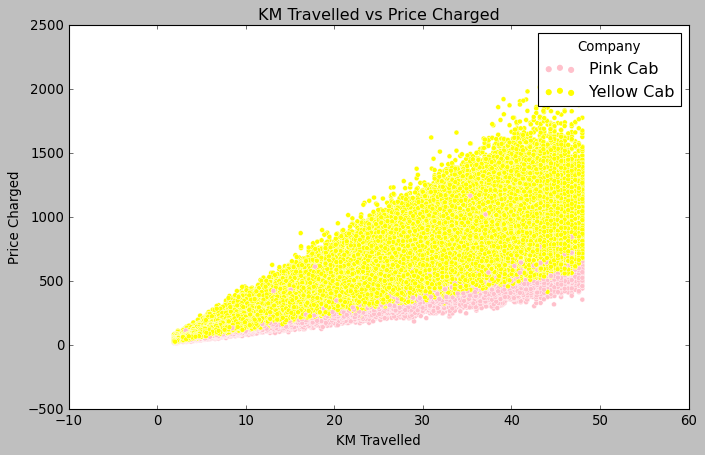

In [43]:
# Scatter plot of KM Travelled vs Price Charged Colored by Company

plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Travelled', y='Price Charged', hue='Company', data=merged_data, palette = ['Pink', 'Yellow'])
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.title('KM Travelled vs Price Charged')
plt.show()

## This scatterplot confirms that there is a high correlation between the variables KM Travelled & Price Charged. The Yellow Cab charges more than the Pink Cab as KM Travelled increases.

# Hypothesis 1: The average price charged by the cab companies differs significantly.

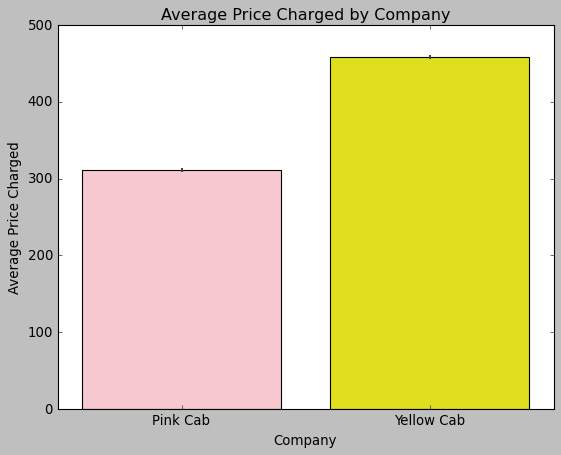

In [44]:
# Bar plot of average Price Charged by Company

merged_data.reset_index(inplace=True)
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Price Charged', data=merged_data, palette = ['Pink', 'Yellow'])
plt.xlabel('Company')
plt.ylabel('Average Price Charged')
plt.title('Average Price Charged by Company')
plt.show()

## We can conclude that there is a high difference between the Avg price charged in both companies with more in the Yellow Cab Company making our hypothesis true. 

C:\Users\Aya K\AppData\Local\Temp\ipykernel_15452\4079502366.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='Price Charged', estimator=sum, ci=None, data=merged_data, palette = ['Pink', 'Yellow'])


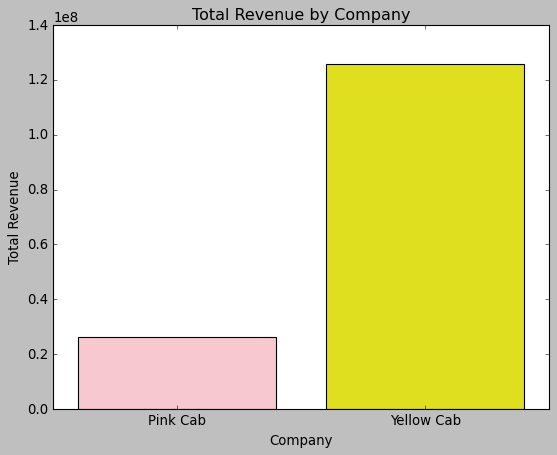

In [45]:
# Bar plot of total revenue by Company

plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Price Charged', estimator=sum, ci=None, data=merged_data, palette = ['Pink', 'Yellow'])
plt.xlabel('Company')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Company')
plt.show()

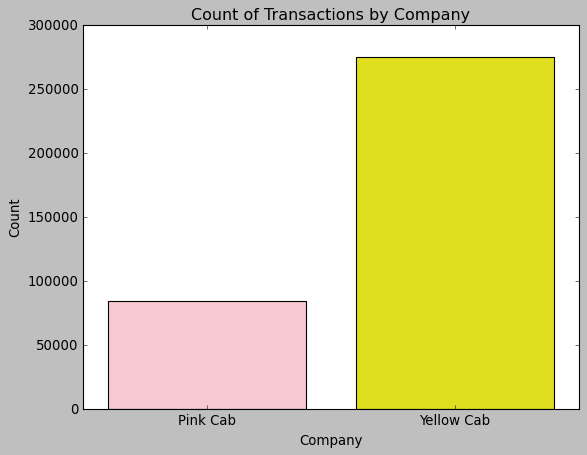

In [46]:
# Bar plot of count of transactions by Company

plt.figure(figsize=(8, 6))
sns.countplot(x='Company', data=merged_data, palette = ['Pink', 'Yellow'])
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Count of Transactions by Company')
plt.show()

# Hypothesis 2: The average profit margin of one cab company is significantly higher than the other.

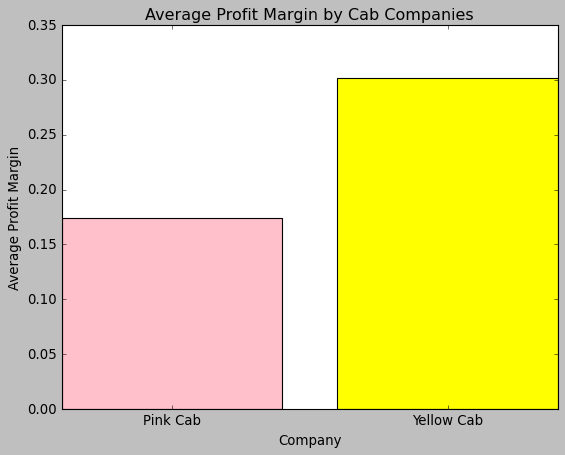

In [63]:
# Calculate the profit margin for each company
merged_data['Profit Margin'] = (merged_data['Price Charged'] - merged_data['Cost of Trip']) / merged_data['Price Charged']

# Group the data by company and calculate the average profit margin
avg_profit_margin_by_company = merged_data.groupby('Company')['Profit Margin'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_profit_margin_by_company.index, avg_profit_margin_by_company.values, color = ['Pink', 'Yellow'])
plt.xlabel('Company')
plt.ylabel('Average Profit Margin')
plt.title('Average Profit Margin by Cab Companies')
plt.show()

## This hypothesis is true. We can tell that the Yellow Cab's avg profit margin is significantly higher than the Pink Cab's. 

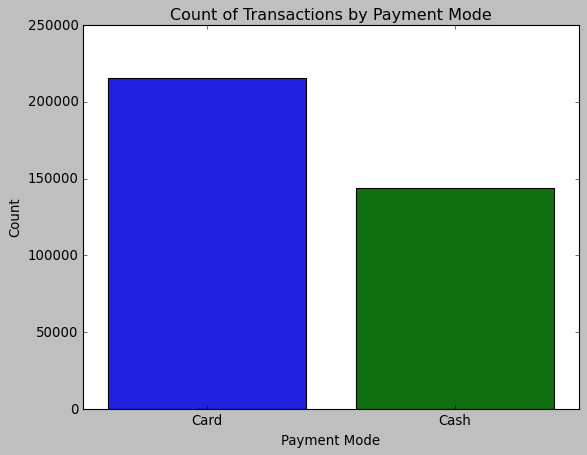

In [48]:
# Bar plot of count of transactions by Payment Mode

plt.figure(figsize=(8, 6))
sns.countplot(x='Payment_Mode', data=merged_data)
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.title('Count of Transactions by Payment Mode')
plt.show()

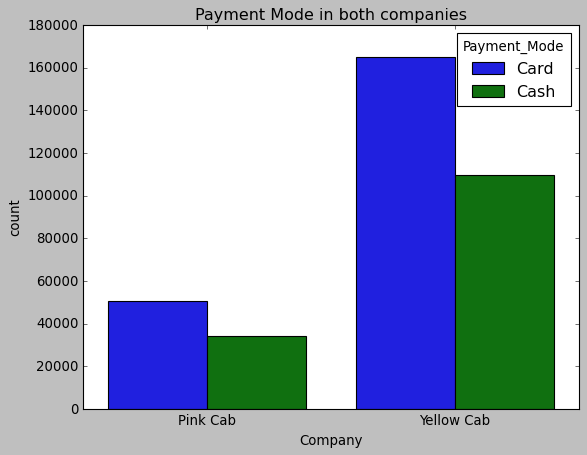

In [49]:
plt.figure(figsize = (8, 6))
sns.countplot(x="Company", hue="Payment_Mode", data = merged_data)
plt.title('Payment Mode in both companies')
plt.show()

## Customers use Card more frequently than Cash as their payment method

# Hypothesis 3: The preferred payment mode varies based on the income level of customers.

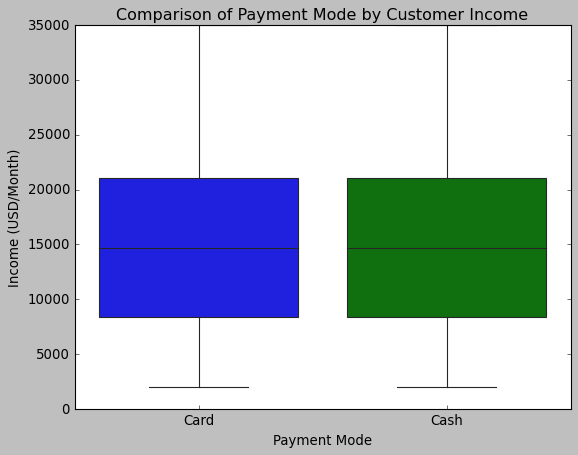

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Payment_Mode', y='Income (USD/Month)', data=merged_data)
plt.xlabel('Payment Mode')
plt.ylabel('Income (USD/Month)')
plt.title('Comparison of Payment Mode by Customer Income')
plt.show()

## This confirms our hypothesis but there is no difference between both payment methods in terms of customer income level. 

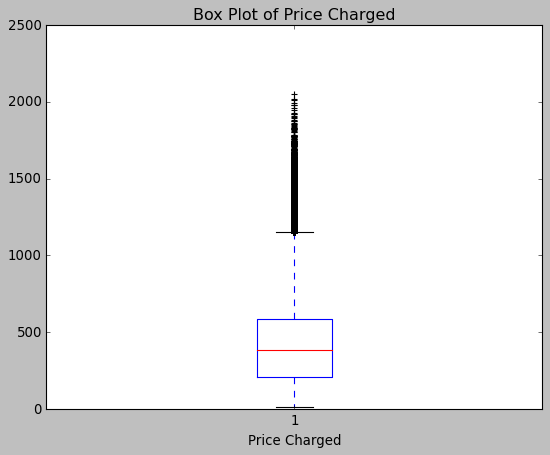

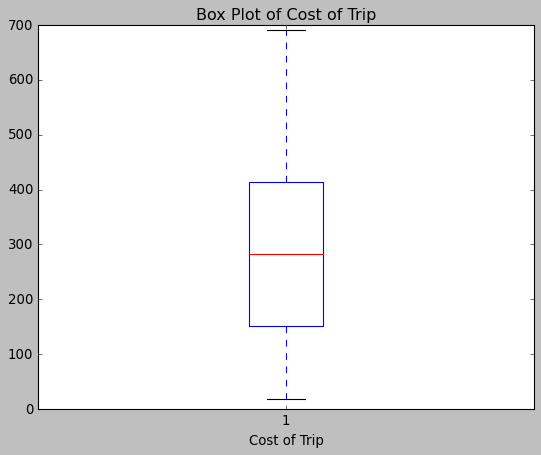

In [51]:
# Identify outliers

plt.figure(figsize=(8, 6))
plt.boxplot(df1['Price Charged'])
plt.xlabel('Price Charged')
plt.title('Box Plot of Price Charged')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df1['Cost of Trip'])
plt.xlabel('Cost of Trip')
plt.title('Box Plot of Cost of Trip')
plt.show()

# Distribution of Variables through Visualization

## Histograms for numeric variables: KM Travelled, Price Charged, & Cost of Trip
## Bar plots for categorical variables: Company & Payment_Mode 

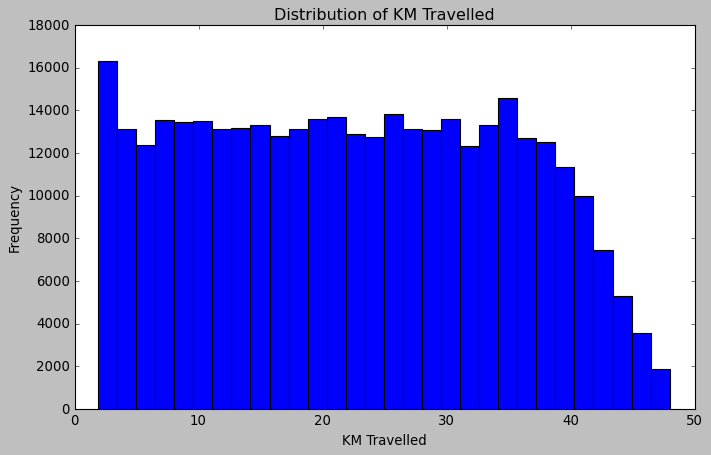

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df1['KM Travelled'], bins=30)
plt.xlabel('KM Travelled')
plt.ylabel('Frequency')
plt.title('Distribution of KM Travelled')
plt.show()

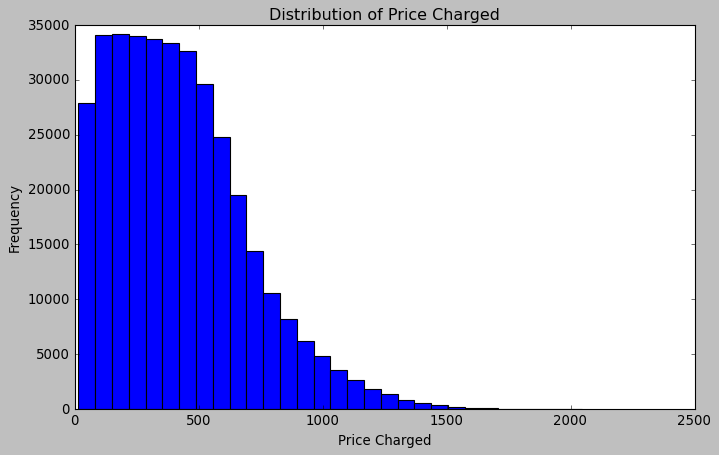

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df1['Price Charged'], bins=30)
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.title('Distribution of Price Charged')
plt.show()

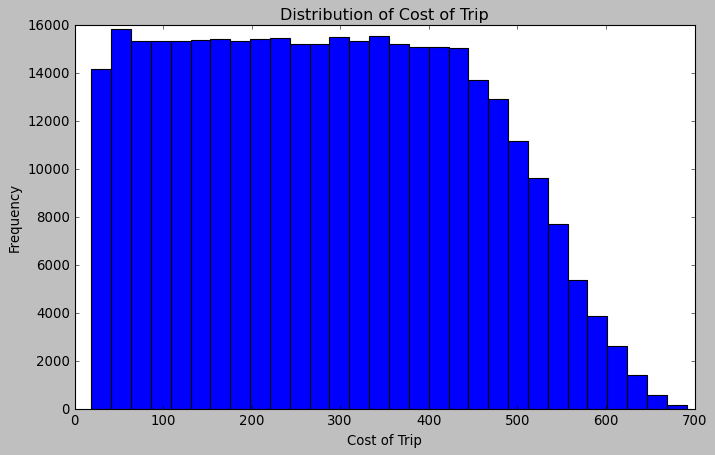

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df1['Cost of Trip'], bins=30)
plt.xlabel('Cost of Trip')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of Trip')
plt.show()

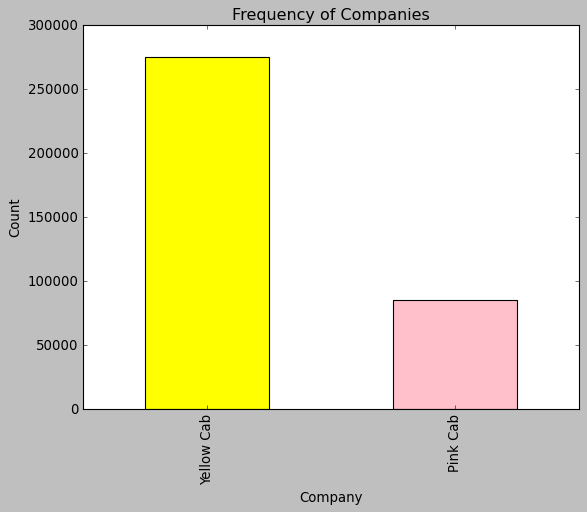

In [56]:
plt.figure(figsize=(8, 6))
df1['Company'].value_counts().plot(kind='bar', color = ['Yellow', 'Pink'])
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Frequency of Companies')
plt.show()

# Hypothesis 4: Cab usage varies among different cities based on their population and number of users.

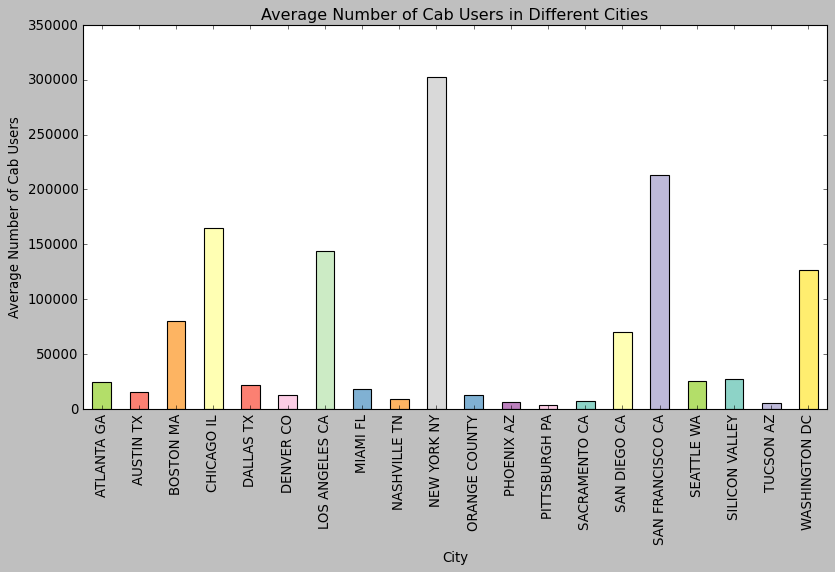

In [57]:
# Visualize the average number of cab users in each city

avg_users_by_city = df4.groupby('City')['Users'].mean()

import random

# Get the number of cities
num_cities = len(avg_users_by_city)

# Generate a list of distinct random colors
colors = random.sample(sns.color_palette('Set3', n_colors=num_cities), num_cities)

plt.figure(figsize=(12, 6))
avg_users_by_city.plot(kind='bar', color = colors)
plt.xlabel('City')
plt.ylabel('Average Number of Cab Users')
plt.title('Average Number of Cab Users in Different Cities')
plt.xticks(rotation=90)
plt.show()

# It is true that the cab usage differs among cities with the highest usage being in New York NY, San Francisco CA, Washington DC, Chicago IL, & Los Angeles CA

# Hypothesis 5: Gender and age demographics of customers differ between the two cab companies.

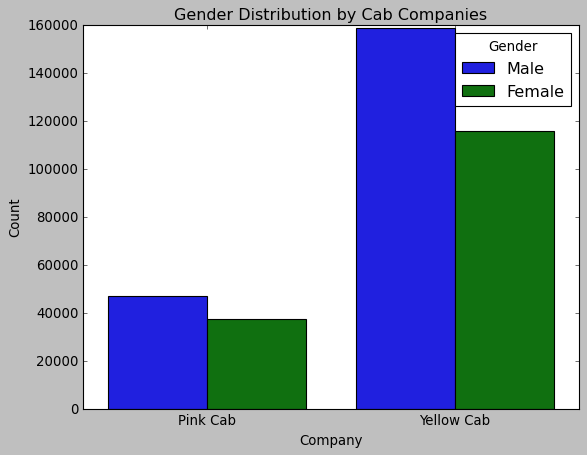

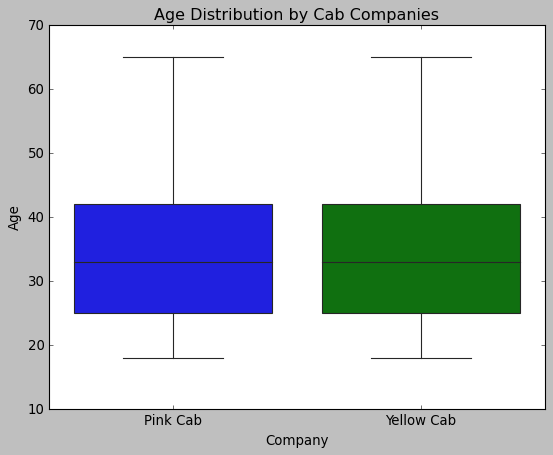

In [58]:
# Countplot to compare the gender distribution between cab companies

plt.figure(figsize=(8, 6))
sns.countplot(x='Company', hue='Gender', data=merged_data)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Gender Distribution by Cab Companies')
plt.show()

# Box plot to compare the age distribution between cab companies
plt.figure(figsize=(8, 6))
sns.boxplot(x='Company', y='Age', data=merged_data)
plt.xlabel('Company')
plt.ylabel('Age')
plt.title('Age Distribution by Cab Companies')
plt.show()

# Age distribution doesn't really differ between both companies, but males not only use cabs more than females but also use the Yellow Cab company more frequently than the Pink Cab company.

# Conclusion: XYZ Firm should invest in the Yellow Cab Company because according to my analysis, Yellow Cab Company has: 
## 1. Higher Profit Margin, Higher Total Revenue, and Higher Count of Transactions signifying more sales
## 2. More Users and Higher Population Usage signifying higher customer satisfaction